In [1]:
import cv2 as cv 
import numpy as np

def bitQuantizeImage(img,k):
    # levels = int(256/k)
    # img = (np.round(img/levels) * levels).astype(np.uint8)
    red = img[:,:,0]
    blue = img[:,:,2]
    green = img[:,:,1]

    levels = pow(2,k)
    levels = 255/levels

    # convert all pixel intensities to the new range
    blue = (np.round(blue/levels) * levels).astype(np.uint8)
    red = (np.round(red/levels) * levels).astype(np.uint8)
    green = (np.round(green/levels) * levels).astype(np.uint8)

    img = np.stack((red,green,blue),axis=2) #stacking the channels together
    return img
    

In [15]:
# bit plane slicing
def bitSlicing(img,k):
    grey = img[:,:,0]
    ans = ((grey >> k) & 1)*255
    return np.stack((ans,ans,ans),axis = 2)

In [16]:
#greyscale function 
def greyscale(img):
    # (w,h) = img.shape[0:2]
    # for i in range(w):
    #     for j in range(h):
    #         (r,g,b) = img[i,j]
    #         img[i,j] = 0.21*r + 0.72*g + 0.07*b
    blue = img[:,:,2]
    red = img[:,:,0]
    green = img[:,:,1]

    blue = 0.07*blue
    green = 0.72*green
    red = 0.21*red

    grey = blue+green+red
    img = (np.stack((grey,grey,grey),axis=2)).astype(np.uint8) #stacking the channels together
    return img

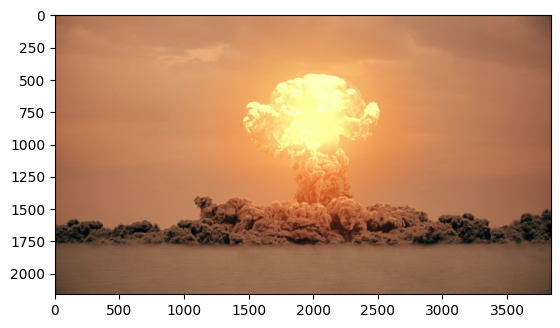

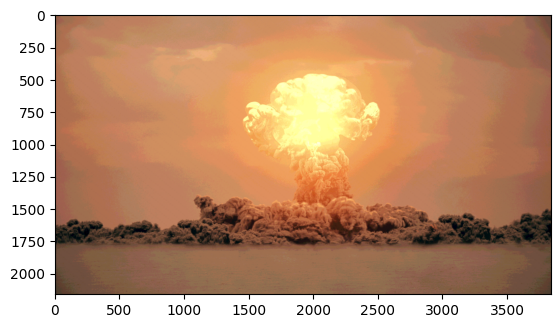

In [17]:
import matplotlib.pyplot as plt

img = cv.imread("../images/atomicbomb.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
result = bitQuantizeImage(img,4)

plt.figure()
plt.imshow(result)

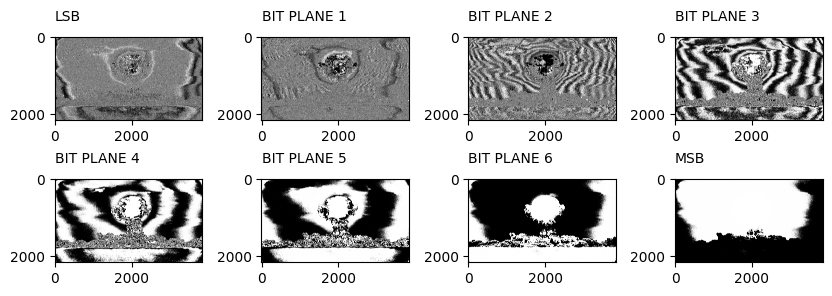

In [45]:
img = greyscale(img)

# adjust spacing between plots
plt.subplots_adjust(left=0.3,
                    bottom=0.1,
                    right=1.5,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(4,4,1)
result = bitSlicing(img,0)
plt.imshow(result)
plt.text(0, 0, "LSB\n")
plt.subplot(4,4,2)
result = bitSlicing(img,1)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 1\n")
plt.subplot(4,4,3)
result = bitSlicing(img,2)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 2\n")
plt.subplot(4,4,4)
result = bitSlicing(img,3)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 3\n")
plt.subplot(4,4,5)
result = bitSlicing(img,4)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 4\n")
plt.subplot(4,4,6)
plt.text(0, 0, "BIT PLANE 5\n")
result = bitSlicing(img,5)
plt.imshow(result)
plt.subplot(4,4,7)
plt.text(0, 0, "BIT PLANE 6\n")
result = bitSlicing(img,6)
plt.imshow(result)
plt.subplot(4,4,8)
plt.text(0, 0, "MSB\n")
result = bitSlicing(img,7)
plt.imshow(result)